0     13012.6
1     13162.6
2     13137.6
3     13254.0
4     12385.7
5     12929.5
6     13002.8
7     13042.7
8     13075.5
9     13095.5
10    13028.6
11    12904.4
12    14881.3
13   -80044.3
14    71976.2
15    22193.6
16    30786.5
17    30890.1
18    12955.4
19    13076.6
20    13058.2
21    12845.7
22    12567.4
23    11860.0
24    12962.0
25    12956.8
26    12941.7
27    12901.5
28    12957.2
Name: pendiente, dtype: float64


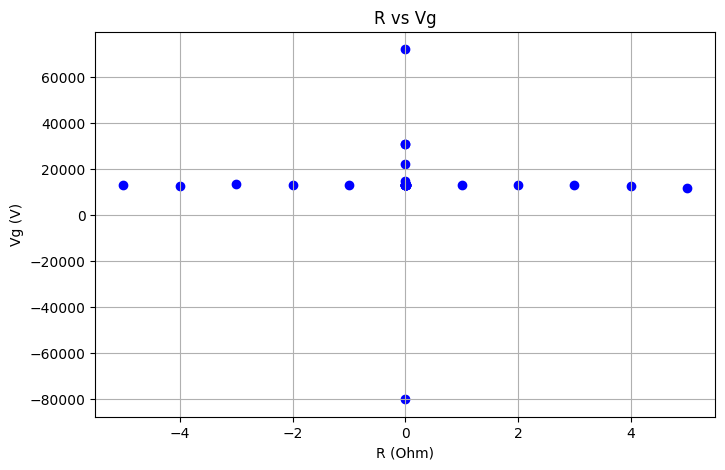

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

archivo = "Prueba.csv"
df = pd.read_csv(archivo, sep=";")

# Supongamos que df ya tiene tus datos
# Seleccionar columnas 2 y 4
x = df.iloc[:, 6]  # segunda columna
y = df.iloc[:, 1]  # cuarta columna

# Convertir a numérico por si hay strings
x = pd.to_numeric(x, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
print (y)

# Graficar
plt.figure(figsize=(8, 5))
plt.scatter(x, y, marker='o', linestyle='-', color='blue')
plt.xlabel('R (Ohm)')
plt.ylabel('Vg (V)')
plt.title('R vs Vg')
plt.grid(True)
plt.savefig("RvsVg.png")
plt.show()
